## <span style=color:red><b>Tasca M6 T01</b></span> 

- [X] <span style=color:red><b>__Exercici 1:__</b></span> 
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('housing data.csv', sep=',')
db=df.copy()
db.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [240]:
db.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [241]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [242]:
db.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [243]:
db['MEDV'].describe()

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

A continuación dividimos los datos en Train y Test

In [244]:
from sklearn.model_selection import train_test_split

db2=db.copy().drop(columns='MEDV')
X_train, X_test, y_train, y_test = train_test_split(db2,db['MEDV'],random_state = 123)

### __Regresión lineal múltiple:__

In [245]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model_lineal = linear_model.LinearRegression().fit(X_train, y_train)
r_sq = model_lineal.score(X_test, y_test)
print(f"El coeficiente de determinación R2 es: {r_sq}")

y_pred = model_lineal.predict(X_test)

print(f"Mean Square Error: MSE = {mean_squared_error(y_test,y_pred)}")


El coeficiente de determinación R2 es: 0.7033672207498376
Mean Square Error: MSE = 26.488260356002563


Como vamos a necesitar esos valores para el ejercicio 2, los guardamos.

In [246]:
datos_R2_MSE=[]
datos_R2_MSE.append(['Regresión Lineal', r_sq, mean_squared_error(y_test,y_pred)])

### Regresión polinomial:

In [247]:
from sklearn.preprocessing import PolynomialFeatures

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
x_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

modelo_poly = linear_model.LinearRegression().fit(x_, y_train)

r_sq = modelo_poly.score(x_test, y_test)
print(f"El coeficiente de determinación R2 es: {r_sq}")

y_pred_poly = modelo_poly.predict(x_test)
#print(f"El valor estimado bajo este modelo es:\n{y_pred2[0]}")
print(f"Mean Square Error: MSE = {mean_squared_error(y_test,y_pred_poly)}")


El coeficiente de determinación R2 es: 0.7499205906195094
Mean Square Error: MSE = 22.33120871567385


In [248]:
datos_R2_MSE.append(['Regresión Polinomial', r_sq, mean_squared_error(y_test,y_pred_poly)])

 ### __Árbol de regresión:__

In [249]:
modelo= DecisionTreeRegressor(max_depth = 3, random_state = 123)

modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


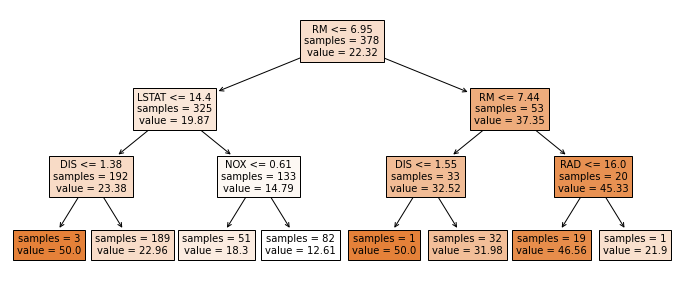

In [250]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = tree.plot_tree(
            decision_tree = modelo,
            feature_names = db2.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [251]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(db2.columns)
               )
print(texto_modelo)

|--- RM <= 6.95
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.38
|   |   |   |--- value: [22.96]
|   |--- LSTAT >  14.40
|   |   |--- NOX <= 0.61
|   |   |   |--- value: [18.30]
|   |   |--- NOX >  0.61
|   |   |   |--- value: [12.61]
|--- RM >  6.95
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.55
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.55
|   |   |   |--- value: [31.98]
|   |--- RM >  7.44
|   |   |--- RAD <= 16.00
|   |   |   |--- value: [46.56]
|   |   |--- RAD >  16.00
|   |   |   |--- value: [21.90]



In [252]:
r_sq_arbol = modelo.score(X_test, y_test)
print(f"El coeficiente de determinación R2 es: {r_sq_arbol}")

y_predt_arbol = modelo.predict(X_test)
MSE_arbol=mean_squared_error(y_test,y_predt_arbol)
print(f"Mean Square Error: MSE = {MSE_arbol}")

El coeficiente de determinación R2 es: 0.5063787517089269
Mean Square Error: MSE = 44.07863545977873


In [253]:
datos_R2_MSE.append(['Árbol de Regresión', r_sq_arbol, MSE_arbol])


### Random forest

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

modelo_RandomForest = RandomForestRegressor(n_estimators = 10, criterion = 'mse', max_depth = None, max_features = 'auto',oob_score = False, n_jobs = -1,random_state = 123)

modelo_RandomForest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

In [255]:
y_pred_RandomForest = modelo_RandomForest.predict(X_test)

r_sq_Forest = modelo.score(X_test, y_test)
print(f"El coeficiente de determinación R2 es: {r_sq_Forest}")
MSE_Forest=mean_squared_error(y_test,y_pred_RandomForest)
print(f"Mean Square Error: MSE = {MSE_Forest}")



El coeficiente de determinación R2 es: 0.5063787517089269
Mean Square Error: MSE = 12.624633858267714


In [257]:
datos_R2_MSE.append(['Random Forest', r_sq_Forest, MSE_Forest])


____


- [X] <span style=color:red><b>__Exercici 2:__</b></span>
Compara’ls en base al MSE i al R2.



De acuerdo con los valores obtenidos de MSE y de R2 en los modelos anteriores, se tiene lo siguiente:

In [258]:
Tabla_Comparacion=pd.DataFrame(datos_R2_MSE)
Tabla_Comparacion.columns=['Modelo de predicción', 'R2', 'MSE']
Tabla_Comparacion

,Modelo de predicción,R2,MSE
0,Regresión Lineal,0.703367,26.488260
1,Regresión Polinomial,0.749921,22.331209
2,Árbol de Regresión,0.506379,44.078635
3,Random Forest,0.506379,12.624634


- [ ] <span style=color:red><b>__Exercici 3:__</b></span>
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.



- [X] <span style=color:red><b>__Exercici 4:__</b></span>
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


In [259]:
# Árbol de Regresión

modelo_arbol= DecisionTreeRegressor(max_depth = 3, random_state = 123)

modelo_arbol.fit(X, y)

r_sq_arbolT = modelo_arbol.score(X_test, y_test)

y_predt_arbol = modelo_arbol.predict(X_test)
MSE_arbolT =mean_squared_error(y_test,y_predt_arbol)

In [260]:
arbol=[]
arbol.append(['Con Train/Test', r_sq_arbol, MSE_arbol])
arbol.append(['Con todos los datos', r_sq_arbolT, MSE_arbolT])

Tabla_Arbol=pd.DataFrame(arbol)
Tabla_Arbol.columns=['Modelo de predicción', 'R2', 'MSE']

Tabla_Arbol

,Modelo de predicción,R2,MSE
0,Con Train/Test,0.506379,44.078635
1,Con todos los datos,0.827145,15.435302


In [261]:
#Random Forest

modelo_RandomForest = RandomForestRegressor(n_estimators = 10, criterion = 'mse',max_depth = None,max_features = 'auto', oob_score = False, n_jobs = -1,random_state = 123)
modelo_RandomForest.fit(X,y)

y_pred_RandomForest = modelo_RandomForest.predict(X_test)

r_sq_ForestT = modelo_RandomForest.score(X_test, y_test)
print(f"El coeficiente de determinación R2 es: {r_sq_Forest}")

MSE_ForestT = mean_squared_error(y_test,y_pred_RandomForest)
print(f"Mean Square Error: MSE = {MSE_Forest}")

El coeficiente de determinación R2 es: 0.5063787517089269
Mean Square Error: MSE = 12.624633858267714


/var/folders/3k/7pds9wx5375860hy6f9cx2vc0000gn/T/ipykernel_57051/29503129.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_RandomForest.fit(X,y)


In [262]:
forest=[]
forest.append(['Con Train/Test', r_sq_Forest, MSE_Forest])
forest.append(['Con todos los datos', r_sq_ForestT, MSE_ForestT])

Tabla_Forest=pd.DataFrame(forest)
Tabla_Forest.columns=['Modelo de predicción', 'R2', 'MSE']

Tabla_Forest

,Modelo de predicción,R2,MSE
0,Con Train/Test,0.506379,12.624634
1,Con todos los datos,0.956170,3.913850



- [X] <span style=color:red><b>__Exercici 5:__</b></span>
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions


In [263]:
db3=db.copy().drop(columns=['RM','MEDV'])
X3_train, X3_test, y3_train, y3_test = train_test_split(db3,db['MEDV'],random_state = 123)

In [264]:
# Regresión Lineal:
model_lineal = linear_model.LinearRegression().fit(X3_train, y3_train)
r_sq_lineal = model_lineal.score(X3_test, y3_test)
y3_pred_lineal = model_lineal.predict(X3_test)
MSE_lineal=mean_squared_error(y3_test,y3_pred_lineal)

datos=[]
datos.append(['Regresión Lineal', r_sq_lineal, MSE_lineal])


# Regresión polinomial

x3_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X3_train)
x3_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X3_test)

modelo_poly = linear_model.LinearRegression().fit(x3_, y3_train)

r_sq_poly = modelo_poly.score(x3_test, y3_test)

y3_pred_poly = modelo_poly.predict(x3_test)
MSE_poly = mean_squared_error(y3_test,y3_pred_poly)

datos.append(['Regresión polinomial', r_sq_poly, MSE_poly])

# Árbol de regresión

modelo_arbol= DecisionTreeRegressor(max_depth = 3, random_state = 123)
modelo_arbol.fit(X3_train, y3_train)
r_sq_arbol = modelo_arbol.score(X3_test, y3_test)


y3_predt_arbol = modelo_arbol.predict(X3_test)
MSE_arbol = mean_squared_error(y3_test,y3_predt_arbol)

datos.append(['Regresión Lineal', r_sq_arbol, MSE_arbol])

# Random Forest

modelo_RandomForest = RandomForestRegressor(n_estimators = 10, criterion = 'mse',max_depth = None,max_features = 'auto', oob_score = False, n_jobs = -1,random_state = 123)
modelo_RandomForest.fit(X3_train, y3_train)

y3_pred_RandomForest = modelo_RandomForest.predict(X3_test)

r_sq_Forest = modelo_RandomForest.score(X3_test, y3_test)
MSE_Forest = mean_squared_error(y3_test,y3_pred_RandomForest)

datos.append(['Random Forest', r_sq_Forest, MSE_Forest])

Tabla_Comparacion2=pd.DataFrame(datos)
Tabla_Comparacion2.columns=['Modelo de predicción', 'R2', 'MSE']
Tabla_Comparacion2


,Modelo de predicción,R2,MSE
0,Regresión Lineal,0.670955,29.382545
1,Regresión polinomial,0.761388,21.307184
2,Regresión Lineal,0.663638,30.035971
3,Random Forest,0.837448,14.515347


In [265]:
Tabla_Comparacion.style.set_caption("Modelos con RM")
Tabla_Comparacion2.style.set_caption("Modelos sin RM")
Tabla_Comparacion

,Modelo de predicción,R2,MSE
0,Regresión Lineal,0.703367,26.488260
1,Regresión Polinomial,0.749921,22.331209
2,Árbol de Regresión,0.506379,44.078635
3,Random Forest,0.506379,12.624634


In [266]:
Tabla_Comparacion2

,Modelo de predicción,R2,MSE
0,Regresión Lineal,0.670955,29.382545
1,Regresión polinomial,0.761388,21.307184
2,Regresión Lineal,0.663638,30.035971
3,Random Forest,0.837448,14.515347
